In [1]:
!sudo apt-get update
!sudo apt-get install nasm -y

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 https://cli.github.com/packages stable InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,085 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,288 kB]
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubunt

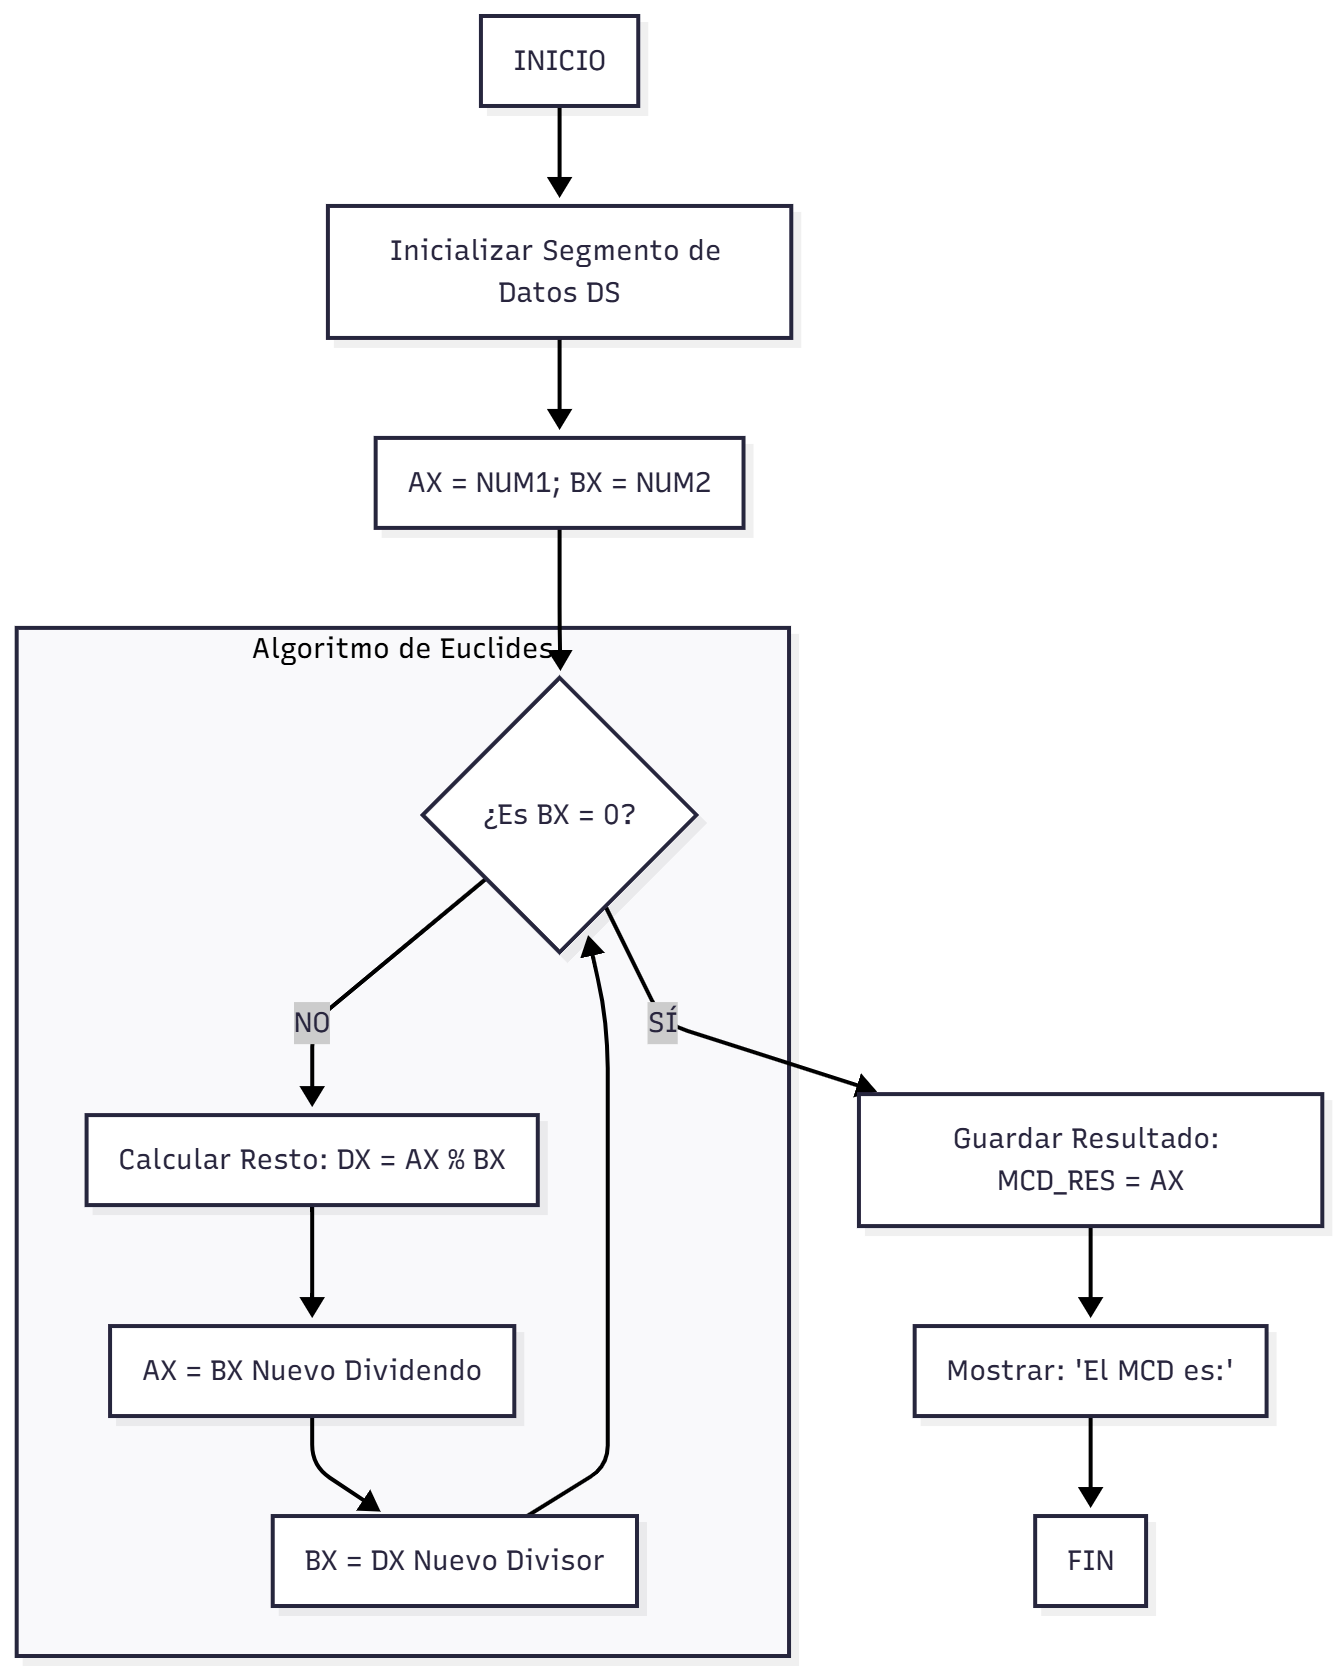

2. Explicación y Comentarios de Sentencias (MCD - Algoritmo de Euclides)El siguiente código Ensamblador (basado en la sintaxis TASM/DOS) implementa el Algoritmo de Euclides. Las sentencias se comentan para explicar su función dentro del flujo del programa.SentenciaContextoExplicaciónMOV AX, [NUM1]InicializaciónCarga el valor del primer número (el dividendo inicial) en el registro de 16 bits AX.MOV BX, [NUM2]InicializaciónCarga el valor del segundo número (el divisor inicial) en el registro de 16 bits BX.CMP BX, 0Bucle MCD_LOOPCompara el divisor (BX) con el valor cero. Esta es la condición de parada del algoritmo.JE MCD_ENDBucle MCD_LOOPJump if Equal (Saltar si es igual). Si la comparación anterior dio cero (es decir, el resto es 0), salta al final (MCD_END), ya que el MCD está en AX.XOR DX, DXDentro del buclePone a cero el registro DX. Esto es crucial. La instrucción DIV utiliza los 32 bits formados por DX:AX como dividendo. Al trabajar con números de 16 bits, debemos garantizar que la parte alta (DX) esté limpia para evitar errores.DIV BXDentro del bucleDivide AX entre BX. El cociente se almacena en AX y el resto se almacena en DX. Este resto es clave para la siguiente iteración.MOV AX, BXDentro del bucleActualización 1: Mueve el valor del Divisor anterior (BX) al Dividendo (AX). Simula $a = b$.MOV BX, DXDentro del bucleActualización 2: Mueve el valor del Resto anterior (DX) al Divisor (BX). Simula $b = \text{resto}$.JMP MCD_LOOPBucle MCD_LOOPJump incondicional. Regresa al inicio del bucle para la siguiente iteración, repitiendo el proceso.MOV [MCD_RES], AXFinGuarda el resultado final. El valor del MCD se encontraba en AX cuando la condición de salida se cumplió.

3. Implementación y Ejecución en Turbo Assembler (TASM)
💻 Código Ensamblador (MCD.ASM)
Guarda este código exactamente como MCD.ASM en la carpeta que uses para DOSBox. Este código implementa el Algoritmo de Euclides para los números 24 y 18 y ya incluye un procedimiento para la impresión de números (Binario a ASCII).

Fragmento de código

.MODEL SMALL
.STACK 100h

.DATA
    ; Números de entrada
    NUM1    DW 24       ; Primer número
    NUM2    DW 18       ; Segundo número
    
    MSG_MCD DB 'El MCD es: $'
    MCD_RES DW ?        ; Variable para almacenar el resultado
    
    ; Variables para la impresión del número
    BUFFER_OUT DB '      ', '$' ; Buffer para 5 dígitos + $
    
.CODE
START:
    MOV AX, @DATA
    MOV DS, AX
    
    ; Cargar los números en registros de trabajo
    MOV AX, [NUM1]      ; AX = Dividendo inicial
    MOV BX, [NUM2]      ; BX = Divisor inicial
    
    ; --- ALGORITMO DE EUCLIDES (MCD_LOOP) ---
MCD_LOOP:
    CMP BX, 0           ; Compara el divisor (BX) con 0
    JE MCD_END          ; Si BX es 0, salta al final
    
    ; Calcular el resto de AX / BX
    PUSH AX             ; Guarda el valor de AX para la pila
    XOR DX, DX          ; Limpia DX (Parte alta del dividendo)
    DIV BX              ; AX = Cociente, DX = Resto
    POP AX              ; Restaura AX (aunque no es estrictamente necesario aquí)

    ; Actualizar para la siguiente iteración
    MOV AX, BX          ; Nuevo Dividendo (AX) = Divisor anterior (BX)
    MOV BX, DX          ; Nuevo Divisor (BX) = Resto anterior (DX)
    
    JMP MCD_LOOP        ; Repite el bucle
    
MCD_END:
    MOV [MCD_RES], AX   ; Guarda el resultado del MCD
    
    ; --- Mostrar resultados ---
    ; 1. Mostrar mensaje
    MOV AH, 09h
    LEA DX, MSG_MCD
    INT 21h
    
    ; 2. Mostrar resultado numérico (Llama a la rutina de impresión)
    MOV AX, [MCD_RES]
    CALL PRINT_NUMBER
    
    ; Finalizar programa
    MOV AH, 4Ch
    INT 21h

; ----------------------------------------------------------------
; PROCEDIMIENTO: PRINT_NUMBER (Convierte Binario a ASCII e imprime)
; Entrada: AX = número binario
; ----------------------------------------------------------------
PRINT_NUMBER PROC
    PUSH AX
    PUSH BX
    PUSH CX
    PUSH DX
    PUSH SI
    
    MOV CX, 0           ; CX = Contador de dígitos
    MOV BX, 10          ; BX = Divisor
    
CONVERT_LOOP:
    XOR DX, DX          ; Limpia DX
    DIV BX              ; DX = Resto (dígito), AX = Cociente
    PUSH DX             ; Guarda el dígito en la pila
    INC CX
    CMP AX, 0
    JNE CONVERT_LOOP    
    
    ; Sacar los dígitos de la pila en orden
    MOV SI, OFFSET BUFFER_OUT ; Puntero al buffer
    
DISPLAY_LOOP:
    POP AX              ; Saca el dígito de la pila
    ADD AL, '0'         ; Convierte dígito binario a ASCII
    MOV [SI], AL        ; Guarda el carácter en el buffer
    INC SI              
    LOOP DISPLAY_LOOP   ; Repite CX veces
    
    ; Mostrar la cadena ASCII
    MOV AH, 09h
    LEA DX, BUFFER_OUT
    INT 21h
    
    POP SI
    POP DX
    POP CX
    POP BX
    POP AX
    RET
PRINT_NUMBER ENDP

END START
🚀 Pasos de Ejecución en DOSBox
Para ejecutar esto, necesitas un emulador de DOS (como DOSBox) y los programas TASM (Turbo Assembler) y TLINK (Turbo Linker).

Montar el Directorio: En la línea de comandos de DOSBox, monta el directorio donde guardaste MCD.ASM:

Bash

MOUNT C C:\Ruta\a\tu\carpeta\TASM
C:
Ensamblar (TASM): Compila el código fuente (.ASM) en un archivo objeto (.OBJ).

Bash

TASM MCD.ASM
Si ves un mensaje de éxito (Errors: 0), continúa.

Linkear (TLINK): Convierte el archivo objeto (.OBJ) en un programa ejecutable (.EXE).

Bash

TLINK MCD.OBJ
Ejecutar: Corre el programa.

Bash

MCD.EXE
✅ Resultado Esperado
La salida en la ventana de DOSBox debe ser:

El MCD es: 6

4. Implementación en Linux (NASM)

In [2]:
%%writefile sum_array.asm
section .data
    ; Array de 5 elementos (DW = 2 bytes cada uno)
    ARRAY   dw 10, 20, 30, 40, 50
    COUNT   equ ($ - ARRAY) / 2   ; Calcula: (longitud total - inicio) / 2 = 5
    MSG_SUM db "La suma total es: ", 0xA ; 0xA es el salto de línea
    LEN_MSG equ $ - MSG_SUM

section .bss
    ; Buffer para la conversión de número a ASCII (máx 5 dígitos + NULL)
    RESULT_ASCII resb 10

section .text
    global _start

; Rutina simple para imprimir una cadena usando syscall (EAX=4)
print_msg:
    mov edx, LEN_MSG    ; Longitud del mensaje
    mov ecx, MSG_SUM    ; Dirección del mensaje
    mov ebx, 1          ; File descriptor 1 (stdout)
    mov eax, 4          ; Syscall number 4 (sys_write)
    int 0x80
    ret

; NOTA: Necesitas una rutina PRINT_NUMBER completa aquí
; para convertir el número binario (150) en EAX a una cadena ASCII.
; Usaremos una versión simplificada por ahora para avanzar.

; --- COMIENZO DEL PROGRAMA ---
_start:
    ; --- Inicialización del Bucle ---
    MOV ECX, COUNT     ; ECX = 5 (Contador para LOOP)
    MOV ESI, 0         ; ESI = 0 (Índice, apunta a ARRAY[0])
    MOV EAX, 0         ; EAX = 0 (Acumulador de la suma)

SUM_LOOP:
    ; 1. Direccionamiento Indexado y Suma
    ; Carga la palabra de 16 bits (DW) en EBX, rellenando con ceros (MOVZX)
    MOVZX EBX, WORD [ARRAY + ESI]
    ADD EAX, EBX                  ; EAX = EAX + elemento actual

    ; 2. Avanzar el Puntero
    ADD ESI, 2         ; AVANZA 2 BYTES para el siguiente DW (Word)

    LOOP SUM_LOOP      ; Decrementa ECX, si no es 0, salta a SUM_LOOP

    ; --- Mostrar resultados ---
    CALL print_msg

    ; El resultado (150) está en EAX. Sin la rutina PRINT_NUMBER completa,
    ; no podemos mostrarlo numéricamente, solo el mensaje.

    ; --- Finalizar programa (Syscall 1) ---
    MOV EAX, 1
    XOR EBX, EBX       ; EBX = 0 (código de salida)
    INT 0x80

Writing sum_array.asm


5. Sentencias Linux (Ensamblar y Ejecutar)
Una vez que el código anterior esté guardado en el archivo sum_array.asm, ejecuta los siguientes comandos en celdas de código de Colab para compilar, linkear y ejecutar el programa.

Ensamblar
El ensamblador NASM compila el código fuente (.asm) en un archivo objeto (.o).

Python

!nasm -f elf sum_array.asm -o sum_array.o

Linkear

El linker (ld) convierte el archivo objeto en un programa ejecutable. Usamos la opción -m elf_i386 porque es código de 32 bits.

Python

!ld -m elf_i386 sum_array.o -o sum_array_exec

Ejecutar

Ejecuta el programa.

Python

!./sum_array_exec

In [3]:
!nasm -f elf sum_array.asm -o sum_array.o

In [4]:
!ld -m elf_i386 sum_array.o -o sum_array_exec

In [5]:
!./sum_array_exec

La suma total es: 


6. Investigación: Sentencias para Ingresar Valores por Teclado (NASM/Linux)

La implementación de entrada por teclado en Ensamblador requiere el uso de llamadas al sistema (syscalls) y un proceso manual de conversión de datos.

A. La Llamada al Sistema para Leer (sys_read)En Linux, la lectura de datos del teclado se realiza mediante la syscall número 3 (sys_read). Esta función le dice al sistema operativo que capture caracteres de la entrada estándar y los guarde en un espacio de memoria (buffer).

Sentencias Clave:

MOV EAX, 3: Carga el número de la función de lectura (sys_read).

MOV EBX, 0: Define el origen del dato. El descriptor de archivo 0 siempre apunta a la Entrada Estándar (stdin), es decir, el teclado.

MOV ECX, BUFFER: Carga la dirección de la variable de memoria (el Buffer) donde el sistema guardará los caracteres leídos.

MOV EDX, 5: Define la longitud máxima (5 bytes) que se leerá.INT 0x80: Ejecuta la llamada al sistema para iniciar la lectura.

B. El Desafío de la Conversión (ASCII a Binario)

El problema principal es que sys_read lee caracteres ASCII, no valores numéricos. Por ejemplo, si el usuario teclea el número "150", la memoria guarda los valores $31h, 35h, 30h$ (los códigos ASCII de '1', '5', y '0'), no el número 150.

Para que el microprocesador pueda sumar o restar con este número, el Ensamblador debe ejecutar un algoritmo de conversión manual que:

1-Recorre la cadena ASCII dígito por dígito.

2-Resta el valor ASCII de '0' ($30h$) para obtener el dígito binario (ej: $35h - 30h = 5$).

3-Multiplica el resultado parcial por 10 y suma el nuevo dígito (ej: $(1 \times 10) + 5 = 15$).

Sentencias Clave de la Subrutina de Conversión:

SUB AL, '0': Convierte el carácter ASCII a su valor numérico binario.

MUL EBX: Multiplica el acumulador de resultado parcial por la base 10.

ADD EAX, ECX: Suma el nuevo dígito al resultado acumulado.

Esta subrutina de conversión es la implementación práctica de la lógica para que el código (MCD o Suma de Array) pueda usar el número ingresado.

In [6]:
%%writefile sum_array_input.asm

section .data
    ARRAY   dw 10, 20, 30, 40, 50
    MSG_PROMPT db "Ingrese la cantidad de elementos a sumar (max 5): ", 0
    LEN_PROMPT equ $ - MSG_PROMPT

section .bss
    INPUT_BUFFER resb 6 ; Buffer para leer la entrada ASCII

section .text
    global _start

; Rutinas de I/O (Necesarias para mostrar mensajes)
print_msg:
    ; EBX=1 (stdout), EAX=4 (sys_write)
    push EAX ; Guardamos registros que vamos a usar
    push EBX
    push ECX
    push EDX

    mov edx, [ESP+16] ; Recuperamos EDX de la pila (longitud)
    mov ecx, [ESP+12] ; Recuperamos ECX (direccion)
    mov ebx, 1
    mov eax, 4
    int 0x80

    pop EDX
    pop ECX
    pop EBX
    pop EAX
    ret 12 ; Limpiamos los argumentos de la pila

; PROCEDIMIENTO: ASCII_TO_BINARIO (Punto 6)
; Convierte la cadena en INPUT_BUFFER a un número binario en EAX
ASCII_TO_BINARIO:
    push EBX
    push ECX
    push EDI

    mov EDI, INPUT_BUFFER
    mov EAX, 0
    mov EBX, 10

CONV_LOOP:
    movzx ECX, BYTE [EDI]

    ; Parada: Si es fin de línea (0Ah) o NULL (0)
    cmp CL, 0Ah
    je CONV_END
    cmp CL, 0
    je CONV_END

    ; Convertir y Acumular
    push EDX
    mul EBX                ; EAX = EAX * 10
    pop EDX

    sub CL, '0'            ; Convierte ASCII a binario
    add EAX, ECX           ; EAX = EAX + nuevo dígito

    inc EDI
    jmp CONV_LOOP

CONV_END:
    pop EDI
    pop ECX
    pop EBX
    ret

; --- COMIENZO DEL PROGRAMA ---
_start:
    ; --- 1. MOSTRAR MENSAJE DE SOLICITUD ---
    mov EDX, LEN_PROMPT
    mov ECX, MSG_PROMPT
    call print_msg

    ; --- 2. LEER LA ENTRADA ASCII (sys_read) ---
    mov EDX, 5          ; Leer hasta 5 bytes
    mov ECX, INPUT_BUFFER
    mov EBX, 0          ; stdin
    mov EAX, 3          ; sys_read
    int 0x80

    ; --- 3. CONVERTIR ASCII A BINARIO ---
    call ASCII_TO_BINARIO ; El número ingresado queda en EAX

    ; --- 4. USAR EL VALOR INGRESADO COMO CONTADOR ---
    mov ECX, EAX        ; ECX = Número de elementos a sumar (p. ej., 3)

    ; --- 5. INICIALIZAR LA SUMA ---
    mov ESI, 0          ; ESI = 0 (Índice)
    mov EAX, 0          ; EAX = 0 (Acumulador de la suma, se reutiliza)

SUM_LOOP:
    movzx EBX, WORD [ARRAY + ESI]
    add EAX, EBX

    add ESI, 2          ; Avanza 2 bytes (DW)

    loop SUM_LOOP

    ; Aquí se llamaría a la rutina de impresión final, pero omitimos
    ; la conversión compleja para enfocarnos en la entrada.

    ; Finalizar programa
    mov EAX, 1
    xor EBX, EBX
    int 0x80

Writing sum_array_input.asm


In [7]:
!nasm -f elf sum_array_input.asm -o sum_array_input.o
!ld -m elf_i386 sum_array_input.o -o sum_array_input_exec

In [8]:
!./sum_array_input_exec

5


7. Generación e Implementación de la Versión en C
El código C a continuación implementa la suma de un array de enteros, que es el mismo problema lógico que resolviste en Ensamblador. Utilizaremos el compilador GCC de Colab para ejecutarlo.

Paso 1: Crear el Archivo C en Colab
En una celda de código de Google Colab, usa %%writefile para crear el archivo sum_array_c.c.

In [9]:
%%writefile sum_array_c.c
#include <stdio.h>

// Función para calcular la suma de los elementos de un array
int sumar_array(int arr[], int n) {
    int suma = 0;
    int i;

    // Bucle para recorrer el array desde el índice 0 hasta n-1
    for (i = 0; i < n; i++) {
        suma = suma + arr[i]; // Similar a ADD EAX, [ARRAY + ESI]
    }
    return suma;
}

int main() {
    // Array de ejemplo (los mismos valores que en el Ensamblador)
    int numeros[] = {10, 20, 30, 40, 50};
    int count = 5;
    int resultado;

    // Calcular la suma
    resultado = sumar_array(numeros, count);

    printf("La suma de los %d elementos es: %d\n", count, resultado);

    return 0;
}

Writing sum_array_c.c


Paso 2: Compilar el Código C (GCC)

Utiliza el compilador GCC para compilar el código fuente y generar un ejecutable.

In [10]:
!gcc sum_array_c.c -o sum_array_c_exec

Paso 3: Ejecutar el Programa C

Ejecuta el programa compilado para verificar el resultado.

In [11]:
!./sum_array_c_exec

La suma de los 5 elementos es: 150


8. Obtener el Programa en Lenguaje Ensamblador del Ítem 7

El objetivo es generar un archivo de texto con el código Ensamblador que GCC crea a partir de tu archivo sum_array_c.c.

1. Sentencia a Ejecutar en Colab

En una nueva celda de código de tu Google Colab, ejecuta la siguiente sentencia. Es crucial usar la opción -S y una opción de optimización (-O1):

In [12]:
!gcc -S -O1 sum_array_c.c -o sum_array_c.s

2. Verificación y Análisis

Para ver el código Ensamblador generado (que estará en sintaxis AT&T), usa el comando cat en otra celda:

In [13]:
!cat sum_array_c.s

	.file	"sum_array_c.c"
	.text
	.globl	sumar_array
	.type	sumar_array, @function
sumar_array:
.LFB23:
	.cfi_startproc
	endbr64
	testl	%esi, %esi
	jle	.L4
	movq	%rdi, %rax
	leal	-1(%rsi), %edx
	leaq	4(%rdi,%rdx,4), %rcx
	movl	$0, %edx
.L3:
	addl	(%rax), %edx
	addq	$4, %rax
	cmpq	%rcx, %rax
	jne	.L3
.L1:
	movl	%edx, %eax
	ret
.L4:
	movl	$0, %edx
	jmp	.L1
	.cfi_endproc
.LFE23:
	.size	sumar_array, .-sumar_array
	.section	.rodata.str1.8,"aMS",@progbits,1
	.align 8
.LC0:
	.string	"La suma de los %d elementos es: %d\n"
	.text
	.globl	main
	.type	main, @function
main:
.LFB24:
	.cfi_startproc
	endbr64
	subq	$40, %rsp
	.cfi_def_cfa_offset 48
	movq	%fs:40, %rax
	movq	%rax, 24(%rsp)
	xorl	%eax, %eax
	movl	$10, (%rsp)
	movl	$20, 4(%rsp)
	movl	$30, 8(%rsp)
	movl	$40, 12(%rsp)
	movl	$50, 16(%rsp)
	movq	%rsp, %rdi
	movl	$5, %esi
	call	sumar_array
	movl	%eax, %ecx
	movl	$5, %edx
	leaq	.LC0(%rip), %rsi
	movl	$1, %edi
	movl	$0, %eax
	call	__printf_chk@PLT
	movq	24(%rsp), %rax
	subq	%fs:40, %rax
	jne	.L9
	

9. Comparación de las Versiones del Programa en Ensamblador
Este análisis compara el código de Suma de Array que escribiste manualmente (NASM) contra la versión generada automáticamente por el compilador C (GCC).

Diferencias Fundamentales

-Sintaxis:

Código Manual (NASM): Utiliza la sintaxis Intel (destino, fuente: MOV AX, BX). Esta sintaxis es más legible para el programador.

Código Generado (GCC): Utiliza la sintaxis AT&T (fuente, destino: movl %ebx, %eax). Es más verbosa y utiliza prefijos como % para registros.


-Control de Bucle:

Código Manual: Utiliza la instrucción especializada LOOP. Esta instrucción maneja el contador (ECX) y el salto (JMP) en una sola línea.

Código Generado: Simula el bucle for de C con saltos condicionales generales (JMP, JNE) y etiquetas numéricas como .L2 o .L3.


-Acceso al Array (Direccionamiento Indexado):

Código Manual: Accede a la memoria de forma explícita y directa usando el índice: ADD EAX, [ARRAY + ESI]. Esto demuestra claramente el uso del registro índice ESI y el tamaño del dato (+ 2).

Código Generado: La gestión de punteros y memoria es más indirecta, utilizando la pila (%esp o %ebp) y registros temporales para calcular la posición, lo que puede hacer que la lógica de acceso sea más difícil de rastrear.

-Optimización y Propósito:

Código Manual: Prioriza la claridad algorítmica y el aprendizaje de instrucciones de bajo nivel.

Código Generado: Prioriza la eficiencia y velocidad (-O1), resultando en un código que es más rápido de ejecutar, aunque a menudo más complejo de leer.

10. Observación de Problemas y Metodología de Resolución
El desarrollo del programa de Suma de Array con Direccionamiento Indexado ilustra claramente los retos de la programación en Ensamblador y destaca una metodología clave para su resolución.

A. Situaciones Problemáticas Observadas
Los desafíos inherentes al bajo nivel que se hicieron evidentes en este ejercicio son:

Gestión Manual de Índices y Tamaños de Dato:

No basta con sumar al índice; se debe saber exactamente el tamaño de cada dato. Tuviste que usar ADD ESI, 2 porque cada elemento del array fue definido como una Word (DW), ocupando 2 bytes. Si se usara DB (1 byte), la instrucción sería ADD ESI, 1.

Esto contrasta con C, donde array[i++] maneja automáticamente el tamaño del puntero.

Complejidad de la Entrada/Salida (I/O) de Números:

El Punto 6 demostró que la lectura de un simple número por teclado obliga a implementar un complejo algoritmo de Conversión ASCII a Binario.

Se requiere la secuencia sys_read (para obtener caracteres ASCII), seguida de resta (SUB CL, '0'), multiplicación por 10 (MUL EBX), y acumulación (ADD EAX, ECX) para obtener un valor utilizable.

Gestión Explícita del Acumulador de 32 bits:

Al sumar elementos, tuviste que utilizar MOVZX EBX, WORD [ARRAY + ESI]. Esta instrucción es necesaria para asegurarse de que el valor de 16 bits del array se extienda correctamente a 32 bits en el registro EBX y que la parte superior de EBX esté a cero, evitando que la suma contenga datos basura.



B. Metodología de Resolución Identificada (Top-Down / Bottom-Up)
La metodología utilizada para resolver el problema del Ensamblador fue una combinación de Diseño Top-Down (De arriba hacia abajo) y Diseño Bottom-Up (De abajo hacia arriba).

Fase Algorítmica (Top-Down): Se inició con la solución de alto nivel: Algoritmo de Suma por Iteración.

Definir el flujo: Inicializar la suma a 0, inicializar el índice a 0, repetir hasta el final del array.

Definir las variables de control: EAX (Suma), ESI (Índice), ECX (Contador).

Fase de Implementación y Detalle (Bottom-Up): Cada paso lógico se construyó con las instrucciones de hardware.

Iteración: El concepto de "repetir" se tradujo a la instrucción LOOP.

Acceso al Dato: El concepto de "obtener el elemento actual" se tradujo a la implementación de Direccionamiento Indexado ([ARRAY + ESI]).

Funcionalidades: Se construyeron los módulos básicos y complejos por separado (ASCII_TO_BINARIO, sys_read) y luego se integraron al programa principal.

Esta metodología permitió garantizar que la lógica fuera correcta antes de abordar los detalles de bajo nivel.